# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
#print(boston['DESCR'])   # descripción del dataset
#boston['data'][: , 11]           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## boston['data'].shape, boston['target'].shape

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [4]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [5]:
import pandas as pd
import math

In [6]:
df_aux = pd.DataFrame(X, columns= boston['feature_names'])
df_aux['target'] = y

df_aux

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

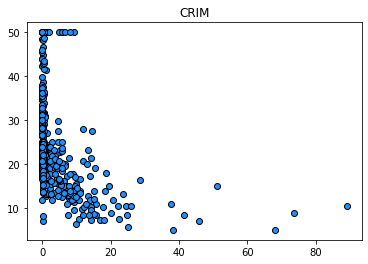

In [7]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [8]:
def display_plots(X,y, columns , displayGraph   ):

    row_idx = 0
    col_idx = 0 
    
    columns_count = len (columns)
    
    if (columns_count == 1):
        
        fig, axes = plt.subplots(1, 1 , figsize=(18, 10))
        displayGraph.display(X = X, y = y,  column = columns[0] , ax_x =  axes )    
  
    elif (columns_count == 2):
        
        fig, axes = plt.subplots(1, 2 , figsize=(18, 10))
        for column in columns:
            displayGraph.display(X = X, y= y , column = column , ax_x = axes[col_idx] ) 
            col_idx = col_idx + 1
    else:
        # Se debe hacer de manera automatica el calculo de figsize
        fig, axes = plt.subplots(int(math.ceil(len(columns) / 2 )), 2 , figsize=(18, 8 * int(math.ceil(len(columns) / 2 ))))
        
        for column in columns:
            displayGraph.display(X = X, y = y , column = column , ax_x = axes[row_idx][col_idx] ) 
            col_idx = col_idx + 1
            if (col_idx == 2):
                col_idx = 0 
                row_idx = row_idx + 1   

In [9]:
class CustomDistPlot():
    
        
    def display(self,  X , y, column, ax_x):
            
        selector = (boston['feature_names'] == column)
        
        ax_x.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
        ax_x.set_title(column)

In [10]:
customDistPlot = CustomDistPlot ()

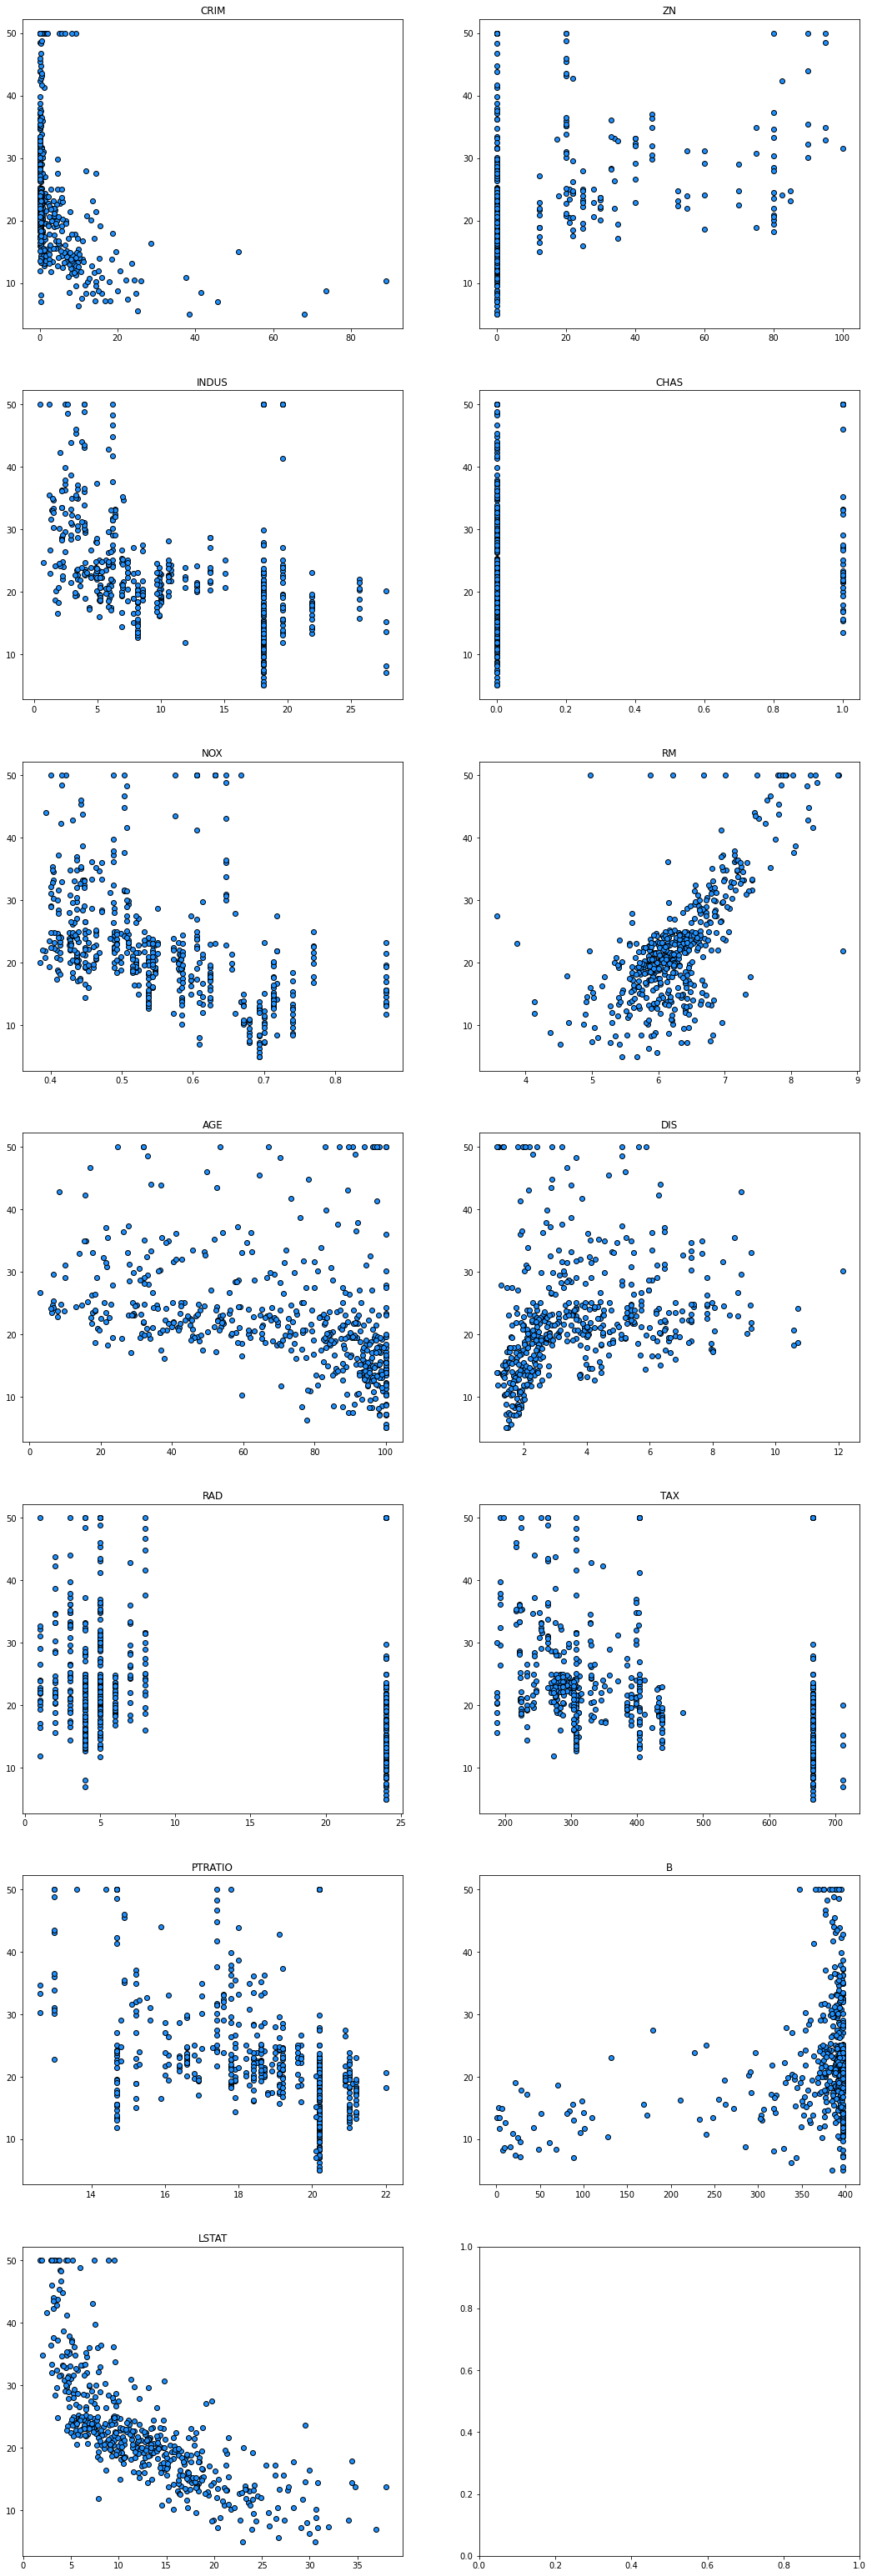

In [11]:
display_plots(X = X , y = y  , columns= boston['feature_names'] , displayGraph= customDistPlot)

In [12]:
#import seaborn
#features = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [13]:
#seaborn.pairplot(df_aux[['CRIM', 'ZN', 'INDUS', 'target']] ,aspect=2 ,height=3 )

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [14]:
# 1. Resolver acá. Ayuda:
#feature = 'CRIM'  # selecciono el atributo 'CRIM'
#selector = (boston['feature_names'] == feature)#
#X_train_f = X_train[:, selector]
#X_test_f = X_test[:, selector]
#X_train_f.shape, X_test_f.shape

In [15]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [16]:

def __internal_linear__(X_train_f,X_test_f,y_test):
   
    model = linear_model.LinearRegression()
    model.fit(X_train_f, y_train)
    y_pred = model.predict(X_test_f)
        
    mse = mean_squared_error(y_test, y_pred)
    
    return (model, mse)
    
    

def generateUnivariableLinearRegressionModels(features , X_train, X_test , y_train, y_test):
    models = []
    
    for feature in features:
      
        selector = (boston['feature_names'] == feature)
        X_train_f = X_train[:, selector]
        X_test_f = X_test[:, selector]
        
        res = __internal_linear__(X_train_f,X_test_f,y_test)
      
        models.append((feature, *res))
    
    models.sort(key = lambda item : item[2] )
    return models



def generateMultivariableLinearRegressionModels(features , X_train, X_test , y_train, y_test):

    models = []
  
    
    for items in features:
    
        selector =  numpy.zeros(X_train.shape[1]).astype(int)
        for item in items:
            selector = (selector | (boston['feature_names'] == item))
           
            
        X_train_f = X_train[:, selector]
        X_test_f = X_test[:, selector]
            
        res = __internal_linear__(X_train_f,X_test_f,y_test)
      
            
        models.append(("-".join(items),*res ))

    return models

In [17]:

#features_to_use = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features_to_use = ['RM' , 'LSTAT']


models = generateUnivariableLinearRegressionModels(features_to_use,  X_train, X_test , y_train, y_test)
models

[('LSTAT', LinearRegression(), 46.33630536002592),
 ('RM', LinearRegression(), 46.907351627395315)]

In [18]:
features_to_use = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
models_example = generateUnivariableLinearRegressionModels(features_to_use,  X_train, X_test , y_train, y_test)
models_example

[('LSTAT', LinearRegression(), 46.33630536002592),
 ('RM', LinearRegression(), 46.907351627395315),
 ('CRIM', LinearRegression(), 76.38674157646072),
 ('INDUS', LinearRegression(), 77.02905244667242),
 ('B', LinearRegression(), 77.75285601192718),
 ('TAX', LinearRegression(), 78.30831374720843),
 ('AGE', LinearRegression(), 80.3915476111525),
 ('PTRATIO', LinearRegression(), 81.79497121208001),
 ('RAD', LinearRegression(), 82.46499985731933),
 ('DIS', LinearRegression(), 82.61874125667718),
 ('ZN', LinearRegression(), 84.66034377707905)]

In [19]:
model = models[0][1]

selector = (boston['feature_names'] == models[0][0])

X_test_f = X_test[:,  selector]
X_train_f = X_train[: , selector]


In [20]:
# 3. Predecir y evaluar acá.
y_pred = model.predict(X_test_f)
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [-0.95648761]
Mean squared error: 46.34


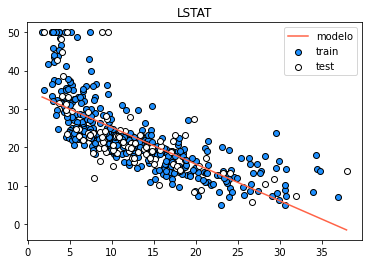

In [21]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title( models[0][0])
plt.legend()
plt.show()



## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy

In [23]:

test = numpy.zeros((2)).astype(int)
test

test  = test | [True, False]
test

array([1, 0])

In [24]:
# 1. Resolver acá.

# def generateLinearRegressionModels(features , X_train, X_test , y_train, y_test):

def __interal_degree__(degrees,X_train_f, X_test_f , y_train , y_test ):
    
    train_errors = []
    test_errors = []
    models = []
        
    for degree in degrees:
            # train:
            pf = PolynomialFeatures(degree)
            lr = LinearRegression(fit_intercept=False)
            model = make_pipeline(pf, lr)
            model.fit(X_train_f, y_train)

            # predict:
            y_train_pred = model.predict(X_train_f)
            y_test_pred = model.predict(X_test_f)

            # evaluate:
            train_error = mean_squared_error(y_train, y_train_pred)
            test_error = mean_squared_error(y_test, y_test_pred)
            train_errors.append(train_error)
            test_errors.append(test_error)
            models.append(model)
    return (models, train_errors , test_errors )


def generateUnivariablePolynomialRegressionModels(features , degrees , X_train, X_test , y_train, y_test , alpa = []):

    models = []
  
    for feature in features:
        selector = (boston['feature_names'] == feature)

        X_train_f = X_train[:, selector]
        X_test_f = X_test[:, selector]
            
        res = __interal_degree__(degrees,X_train_f, X_test_f , y_train , y_test)
            
        models.append((feature,*res ))

    return models


def generateMultivariablePolynomialRegressionModels(features , degrees , X_train, X_test , y_train, y_test , alpa = []):

    models = []
  
    
    for items in features:
    
        selector =  numpy.zeros(X_train.shape[1]).astype(int)
        for item in items:
            selector = (selector | (boston['feature_names'] == item))
          
            
        X_train_f = X_train[:, selector]
        X_test_f = X_test[:, selector]
            
        res = __interal_degree__(degrees,X_train_f, X_test_f , y_train , y_test)
            
        models.append(("-".join(items),*res ))

    return models

In [25]:
degrees = [1,2,3,4,5,6,7,8]

#features_to_use = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features_to_use = ['ZN' ,'LSTAT' ,'RM' , 'CRIM']

result_test = generateUnivariablePolynomialRegressionModels(features_to_use , degrees , X_train, X_test , y_train, y_test)

In [26]:
def display_plots_mse(data, columns_number  , displayGraph):

    row_idx = 0
    col_idx = 0 
    
    columns_counter = 0
    columns_count = columns_number
    
    if (columns_count == 1):
        
        fig, axes = plt.subplots(1, 1 , figsize=(18, 10))
        displayGraph.display(data = data, ax_x =  axes , index = columns_counter )    
  
    elif (columns_count == 2):
        
        fig, axes = plt.subplots(1, 2 , figsize=(18, 10))
        for column in range (columns_number):
            displayGraph.display(data = data , ax_x = axes[col_idx] , index = columns_counter) 
            columns_counter = columns_counter + 1
            col_idx = col_idx + 1
    else:
        # Se debe hacer de manera automatica el calculo de figsize
        fig, axes = plt.subplots(int(math.ceil(columns_number / 2 )), 2 , figsize=(18, 8 * int(math.ceil(columns_number / 2 ))))
        
        for column in range(columns_number):
            displayGraph.display(data = data,  ax_x = axes[row_idx][col_idx] , index = columns_counter ) 
            columns_counter = columns_counter + 1
            
            col_idx = col_idx + 1
            if (col_idx == 2):
                col_idx = 0 
                row_idx = row_idx + 1     

In [27]:
class CustomPlot():
   
    
    def display(self, data , ax_x , index):
        
      
        ax_x.plot(degrees, data[index][2], color="blue", label="train")
        ax_x.plot(degrees, data[index][3], color="red", label="test")
        ax_x.legend()
        ax_x.set_xlabel("degree")
        ax_x.set_ylabel("error")
        ax_x.set_title(data[index][0])

In [28]:
customPlot = CustomPlot()

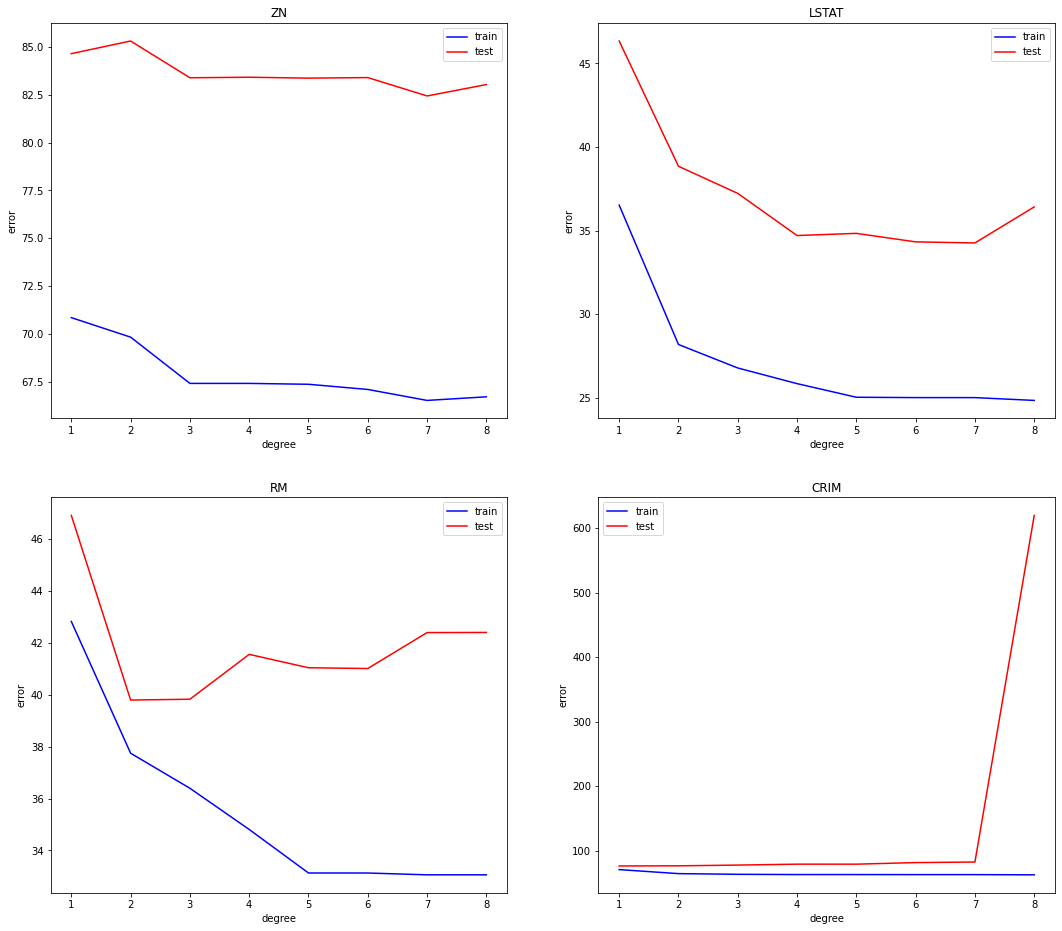

In [29]:
display_plots_mse(data = result_test, columns_number  = len(result_test) , displayGraph = customPlot)

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [30]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [43]:
# 2. Resolver acá.

degrees = [1,2,3,4,5,6]

#features_to_use = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
#features_to_use = [['ZN' ,'LSTAT' ,'RM' , 'CRIM'] , ['ZN' ,'LSTAT' ,'RM'] , ['LSTAT' ,'RM']]

features_to_use = [ ['LSTAT' ,'RM']]



result_multivariable = generateMultivariablePolynomialRegressionModels(features_to_use , degrees , X_train, X_test , y_train, y_test)

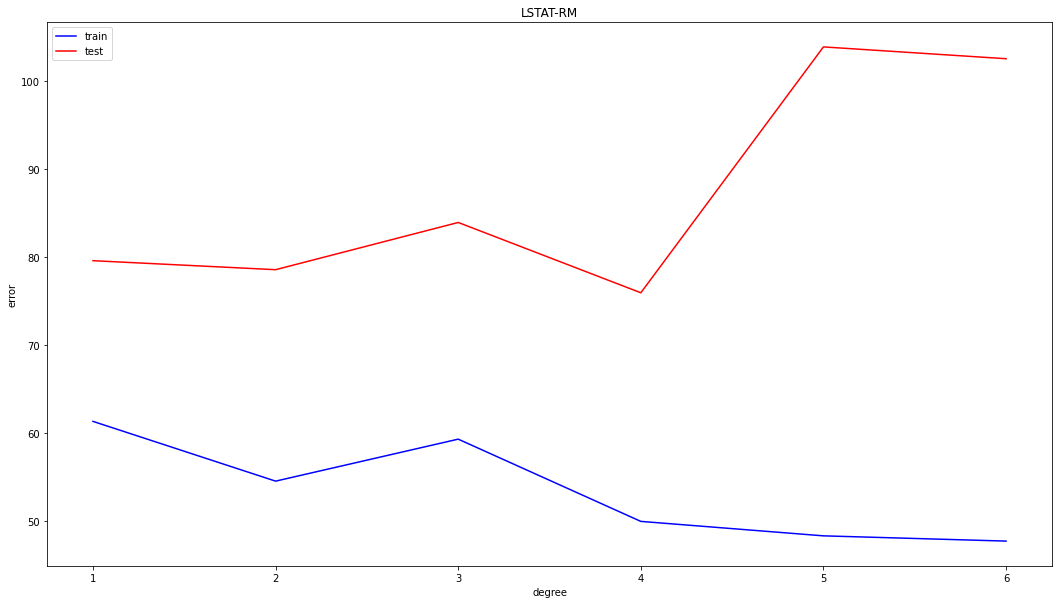

In [44]:
display_plots_mse(data = result_multivariable, columns_number  = len(features_to_use) , displayGraph = customPlot)

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

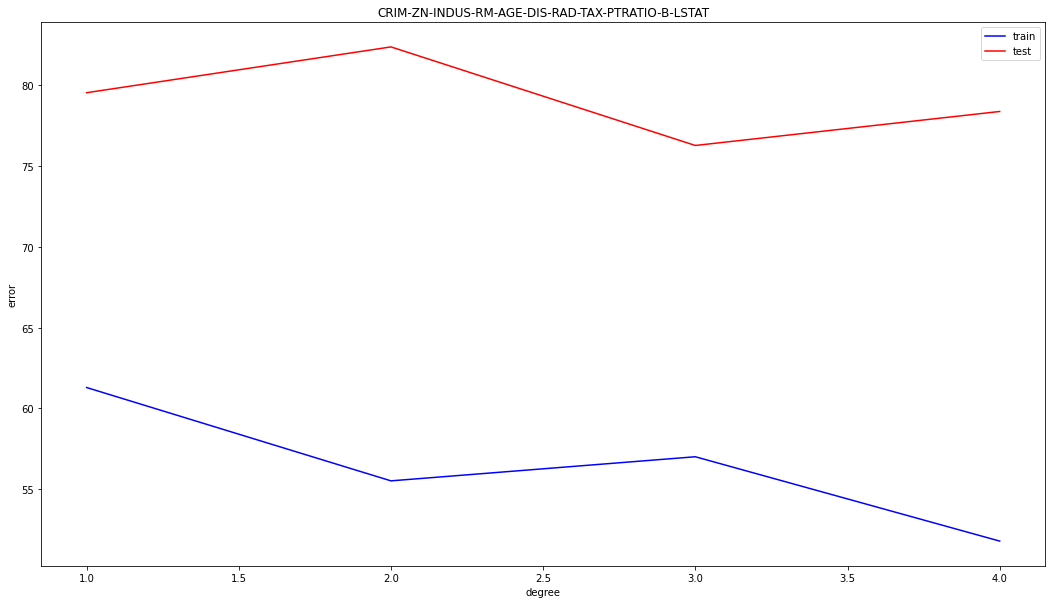

In [97]:
degrees = [1,2,3,4]

features_to_use = [['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#features_to_use = [['ZN' ,'LSTAT' ,'RM' , 'CRIM'] , ['ZN' ,'LSTAT' ,'RM']]

result_multivariable_opcional = generateMultivariablePolynomialRegressionModels(features_to_use , degrees , X_train, X_test , y_train, y_test)

display_plots_mse(data = result_multivariable_opcional, columns_number  = len(features_to_use) , displayGraph = customPlot)


In [98]:
features_to_use = [['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
models_example_multivariable = generateMultivariableLinearRegressionModels(features_to_use,  X_train, X_test , y_train, y_test)
models_example_multivariable

[('CRIM-ZN-INDUS-RM-AGE-DIS-RAD-TAX-PTRATIO-B-LSTAT',
  LinearRegression(),
  81.14519220828619)]

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?



In [46]:
# 1. Resolver acá.

# def generateLinearRegressionModels(features , X_train, X_test , y_train, y_test):
from sklearn.linear_model import Ridge 

def __interal_degree_ridge__(X_train_f, X_test_f , y_train , y_test , feature, alphas = [0] , degrees = [1]):
    
    train_errors = []
    test_errors = []
    alphas_values = []
    degrees_values = []
    models = []
    features = []
    
    for degree in degrees:
            
            for alpha in alphas:

                # train:
                pf = PolynomialFeatures(degree)
                clf = Ridge(alpha=alpha)
                model = make_pipeline(pf, clf)
                model.fit(X_train_f, y_train)

                # predict:
                y_train_pred = model.predict(X_train_f)
                y_test_pred = model.predict(X_test_f)

                # evaluate:
                train_error = mean_squared_error(y_train, y_train_pred)
                test_error = mean_squared_error(y_test, y_test_pred)
                train_errors.append(train_error)
                test_errors.append(test_error)
                alphas_values.append(alpha)
                models.append(model)
                degrees_values.append(degree)
                features.append(feature)
                
                
    return (features, models, train_errors , test_errors , degrees_values,alphas_values )




def generateUnivariablePolynomialRegressionRidgeModels(features , X_train, X_test , y_train, y_test , alpas = [0] , degrees = [1]):

    models = []
  
    for feature in features:
        selector = (boston['feature_names'] == feature)

        X_train_f = X_train[:, selector]
        X_test_f = X_test[:, selector]
            
        res = __interal_degree_ridge__(X_train_f, X_test_f , y_train , y_test , feature, alphas , degrees)
        
        models.append(res)
        

    return models


def generateMultivariablePolynomialRegressionRidgeModels(features ,  X_train, X_test , y_train, y_test , alpas = [0], degrees = [1]):

    models = []
  
    
    for items in features:
    
        selector =  numpy.zeros(X_train.shape[1]).astype(int)
        for item in items:
            selector = (selector | (boston['feature_names'] == item))
          
            
        X_train_f = X_train[:, selector]
        X_test_f = X_test[:, selector]
            
        res = __interal_degree__(X_train_f, X_test_f , y_train , y_test,  "-".join(items), alphas, degrees )
            
        models.append(res)

    return models



In [71]:
degrees = [1,2,3,4,5,6,7,8]
alphas = [0.1, 0.01, 0.001]
#features_to_use = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features_to_use = ['ZN' ,'LSTAT' ,'RM' , 'CRIM']
#features_to_use = ['LSTAT' ,'RM' ]
#features_to_use = ['LSTAT' , 'B']




result_ridge = generateUnivariablePolynomialRegressionRidgeModels(features = features_to_use , X_train = X_train, X_test = X_test , y_train = y_train, y_test  = y_test , alpas=alphas, degrees=degrees)

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.37238e-17): result may not be accurate.
  overwrite_a=True).T
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.20151e-18): result may not be accurate.
  overwrite_a=True).T
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.20151e-19): result may not be accurate.
  overwrite_a=True).T
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.20151e-20): result may not be accurate.
  overwrite_a=True).T
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py

In [72]:
result_ridge[1]

(['LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT',
  'LSTAT'],
 [Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                  ('ridge', Ridge(alpha=0.1))]),
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                  ('ridge', Ridge(alpha=0.01))]),
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                  ('ridge', Ridge(alpha=0.001))]),
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                  ('ridge', Ridge(alpha=0.1))]),
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                  ('ridge', Ridge(alpha=0.01))]),
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                  ('ridge', Ridge(alpha=0.001))]),
  Pipeline(steps=[('polynom